In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
sns.set()
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


The Dataset has 

**Churn Label** - [Yes/No] - This represents if the corresponding customer has left the services of the Telco Organization or not

**Services and customer account information** - The services provided by the orgnaization and if the customers signed for it or not, also the type of service if there is a sub category/ies for the service, and the account informations like their contract type, payment methods etc

Demographic data for the customers

In [4]:
display(df.shape)
display(df.info())

(7043, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

None

In [5]:
df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [6]:
df = df.drop(['Churn Value','Churn Score'], axis = 1)

Checking for **Misssing** values and fill it with required values 

In [7]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Yes,No,Two year,No,Mailed check,73.35,NaN,No,2342,NaN


In [10]:
df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']

In [11]:
df['diff_in_charges'] = df['Total Charges'] - df['calc_charges']

In [12]:
df['diff_in_charges']

0         0.45
1        10.25
2        23.30
3       111.65
4       -45.00
         ...  
7038   -103.40
7039    -44.70
7040    -67.50
7041     20.85
7042   -128.40
Name: diff_in_charges, Length: 7043, dtype: float64

In [13]:
fig = px.histogram(df, x="diff_in_charges",color = 'Contract',marginal="box")
fig.show()

This shows the difference between the actual total chargers of our customers and the values that we calculated by multiplying the monthly chargers and the number of months that the customer used the service.

the median difference is 1$ which means that 50% of data the multiplied value of charges(calculated) and the Total charges columns is same 

In [14]:
df.groupby('Contract')[['Total Charges','diff_in_charges']].quantile([.50,.80,.90,.95])

Total Charges  diff_in_charges
Contract                                           
Month-to-month 0.50       679.5500           0.0000
               0.80      2485.7300          24.8100
               0.90      3844.0600          54.0200
               0.95      4966.9200          85.3300
One year       0.50      2657.5500           0.7750
               0.80      5286.4600          55.0500
               0.90      6341.2500          92.2000
               0.95      7072.4725         133.3375
Two year       0.50      3623.9500           0.5000
               0.80      6399.2400          61.5300
               0.90      7457.6100          97.5700
               0.95      7922.3400         139.1800

95% of customers have the difference is less than 10% of the median total charges, and so we replace the missing values of total charges with those calculated in terms of monthly charges.

In [15]:
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])

In [16]:
df = df.drop(['calc_charges','diff_in_charges'], axis=1)

**EDA (Exploratory Data Analysis)**

In [17]:
fig = px.pie(df.groupby('Churn Label')['CustomerID'].nunique().reset_index(), 
             values='CustomerID', 
             names='Churn Label',)
fig.show()

**26.5%** of the customers have the label of yes for churn and **73.5%** have the label no which means that 26.5% have left the services of the organization and the later number have resumed or still use the services

**DEMOGRAPHIC DATA** for the Customers

In [18]:
df.groupby(['Country','State'])['CustomerID'].count()

Country        State     
United States  California    7043
Name: CustomerID, dtype: int64

All the customers in the organization are from USA belonging to different cities which we see here

In [19]:
display(df['City'].nunique())
display(df['City'].unique())


1129

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [20]:
fig = px.bar(df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False).head(30),
             x='City',
             y='CustomerID', 
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

**SERVICE TENURES FOR CUSTOMERS**

In [21]:
fig = px.histogram(df, x="Tenure Months", color="Churn Label",marginal="box" )
fig.show()

In [22]:
display(df.groupby('Churn Label')['Tenure Months'].quantile([.25,.50, .75]))
display(df.groupby('Churn Label')['Tenure Months'].mean())

Churn Label      
No           0.25    15.0
             0.50    38.0
             0.75    61.0
Yes          0.25     2.0
             0.50    10.0
             0.75    29.0
Name: Tenure Months, dtype: float64

Churn Label
No     37.569965
Yes    17.979133
Name: Tenure Months, dtype: float64

**Inference** : half of the customers in the dataset left the services of the organizations after 10 months, and also number of customers in churn ceases to decline after 5 months

**CHURN REASONS** 

In [23]:
fig = px.bar(df.groupby(['Churn Reason'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False),
             x='Churn Reason',
             y='CustomerID', 
             color = 'CustomerID',color_continuous_scale='tealgrn',
             text = 'CustomerID')
fig.show()
display()

- **33.2%** of churn customers left the service due to the fact that the competitor made the best offer (speed, data, devices).

- **17.3%** of churn customers cited the attitude of a support specialist or provider as the reason.

A number of customers have left because they left or deceased which would not be a concern for the organization so we remove those customers from the set

In [24]:
df = df[df['Churn Reason'] != 'Moved']
df = df[df['Churn Reason'] != 'Deceased']

**CHARGES**

Charges in the dataframe
- Total Charges
- Monthly Charges

In [25]:
fig = px.histogram(df, x="Total Charges", color="Churn Label",
                  
                  marginal='box')
fig.show()

The median charges of customers who have gone into churn are more than 2 times lower than the median charges of customers who use the service, it does not directly imply that customers using the service were well to do and those who left were less privelaged with money 

For monthly charges

In [26]:
fig = px.histogram(df, x="Monthly Charges", color="Churn Label",
                   marginal="box"
                  )
fig.show()

<div>The median monthly charges of customers who have left the service are higher  than those of customers who are still active. previously this trend was verified, this trend may be due to certain services which are represented by other features in the dataset.

**CONTRACT TYPES**

In [27]:
fig = px.histogram(df, x="Churn Label", color="Contract", barmode="group",
                   title="Customers according to different Contract types",)
fig.update_layout(width=800, height=600, bargap=0.05)
fig.show()

In [28]:
colors = ['blue', 'black', 'gray']
fig = px.pie(df.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Contract',
            facet_col = 'Churn Label',
            color_discrete_sequence=colors,
            title = 'Churn by contract type')
            
fig.show()

Almost 89% of customers who already left the service had monthly types contract

**SERVICES PROVIDED BY THE ORGANIZATION**

Different Services Provided are:
- Phone Service
- Internet Service
- Online Security
- Online Backup
- Device Protection
- Multiple Lines
- Tech Support
- Streaming TV
- Streaming Movies 

Visualizing correlation values which first requires to convert object data type features to numerical

In [29]:
df_1 = df.copy()
df_1['Churn Label'].replace(to_replace='Yes', value=1, inplace = True)
df_1['Churn Label'].replace(to_replace='No',  value=0, inplace = True)
corr_df_1 = pd.get_dummies(df_1[['Churn Label','Phone Service','Multiple Lines','Internet Service','Online Security',
                                 'Online Backup','Device Protection','Tech Support','Streaming TV',
                                 'Streaming Movies']])
corr_df_1.head()



,Churn Label,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,...,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes
0,1,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,1,0,1,0,0,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,1
5,1,0,1,1,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
6,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,0,0,1
7,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


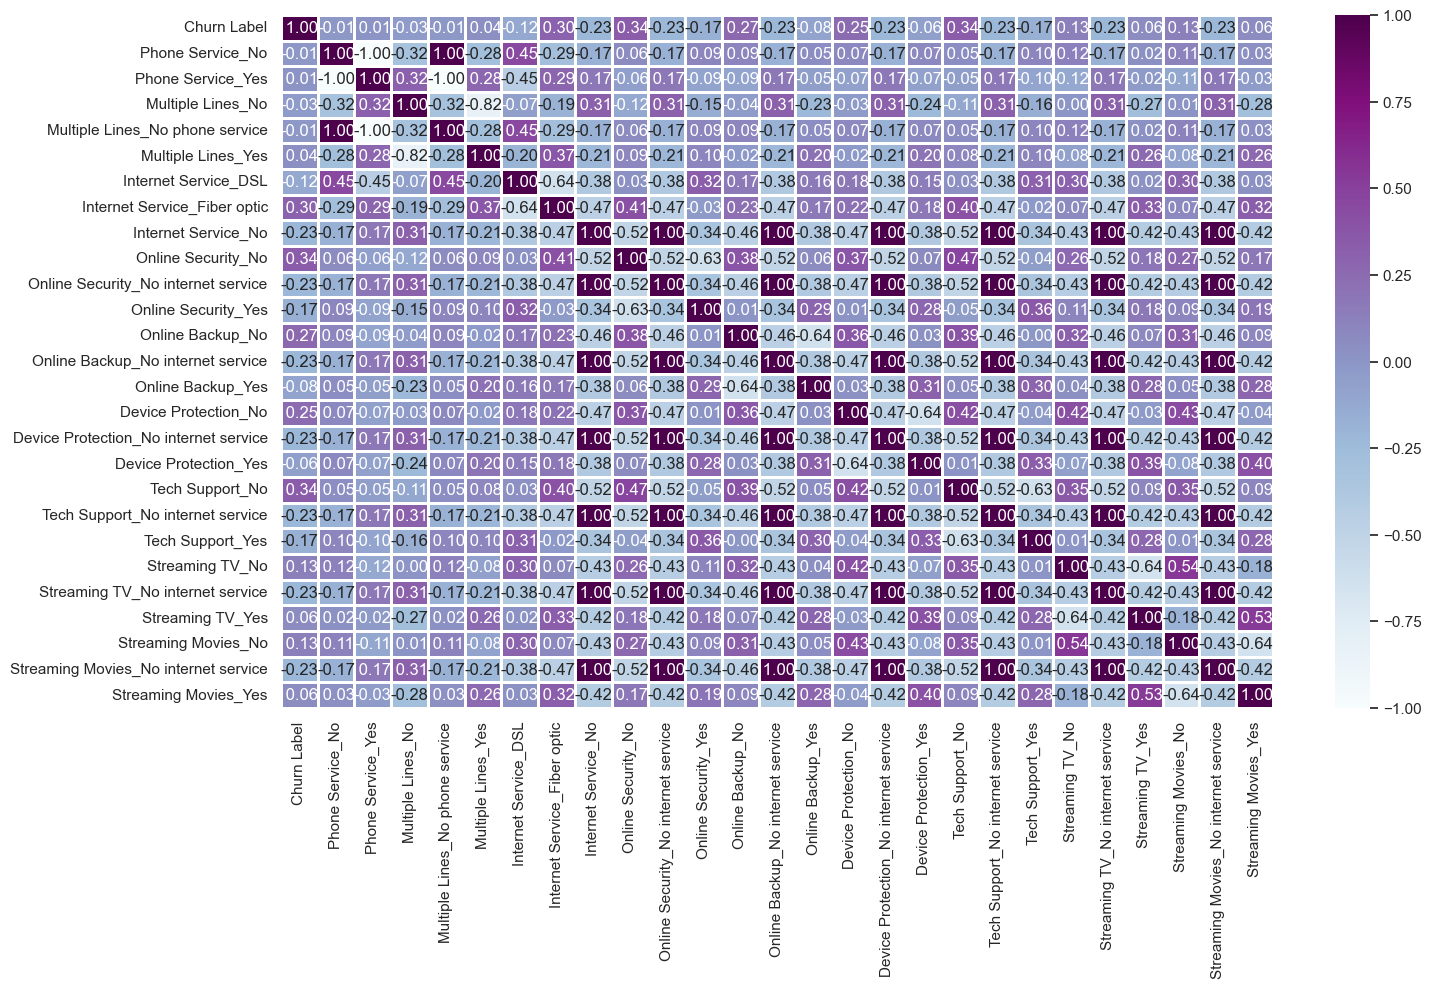

In [30]:
plt.figure(figsize=(16,9))
sns.heatmap(corr_df_1.corr(), annot=True, cmap = 'BuPu', fmt = ' .2f', linewidths=0.8)
plt.show()

In [31]:
fig = px.bar(corr_df_1.corr()['Churn Label'].sort_values(ascending = False), 
             color = 'value',color_continuous_scale='tealgrn')
fig.show()

No Tech Support, online security and online backup services have high correlation with Churn and so does fiber optic

In [32]:
fig = px.bar(df_1.groupby('Internet Service')['CustomerID'].count().reset_index(),
             x='Internet Service',
             y='CustomerID', 
             color = 'Internet Service',
             text = 'CustomerID',color_discrete_sequence=colors)
fig.show()

- Most cutomers have - fiber optic
- some customers dont use the internet services 
- A decent amount use the DSL

In [33]:
fig = px.pie(df_1.groupby(['Internet Service','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'Churn Label',
             names='Internet Service',
            title = 'Usage of Internet Services among customers who left the services of the organization and those who did not',
            color_discrete_sequence=colors,hole = .4)
fig.show()

- 69% of the people who left the services of the organization used the fiber optic internet servicewhich explains the correlation with the churn labels
- the number of people still using the services use the DSL internet service marginally more than the  Fiber Optic

**ONLINE SECURITY AND TECH SUPPORT**

In [34]:
fig = px.bar(df_1.groupby(['Internet Service','Online Security',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             #barmode="group",
             text = 'CustomerID',
             facet_col = 'Online Security'
            )
fig.show()

among customers with fiber optics Internet, the percentage of churn is lower for the ones with the connected tech support option.

In [35]:
fig = px.pie(df_1.groupby(['Tech Support','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'Churn Label',
             hole = .4,
             names='Tech Support',
            title = 'Percentage of Churn according to Tech Support service option',
            color_discrete_sequence=colors)
fig.show()

77.5% of the people who left the services had no tech support and amongst those still using the sevices of the organization the option the distribution of people with and without tech support is very marginal

In [36]:
fig = px.bar(df_1.groupby(['Internet Service',
                                                'Tech Support',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             text = 'CustomerID',
             barmode="group",
             facet_col="Tech Support",
            color_continuous_scale='agsunset')
fig.show()

**Summarizing Dependencies on Services:**
- Customers with no internet services have the lowest churn rate which may or may not correlate with charges and expenses based on internet connection.
- 69.2% of the clients who exited the services were connected to the fiber optic Internet which may similarly be a intersection with people with higher total charges.
- the absence of connected technical support and online security options also  correlated with the   churn variable. 

**PAYMENT METHODS**

The number of ways payment methods vary across customers in the dataset are :
- Mailed Check
- Electronic Check
- Credit Card(Automatic)
- Bank Transfer(Automatic)

In [37]:
plt.figure(figsize = (16,9))
fig = px.pie(df_1.groupby(['Payment Method','Churn Label'])['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Churn Label',
            facet_col = 'Payment Method',
            color = 'Churn Label',
            title = 'Churn rate by customer payment method')

fig.show()

<Figure size 1600x900 with 0 Axes>

- The customers with automatic payment methods (credit card and bank transfer) tend to leave the services of the organization less than that for electronic and mailed checks type methods
- 44.5% of the customers that used Electronic Check have left the services of the organization

In [38]:
fig = px.bar(df_1.groupby(['Payment Method',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Payment Method", 
             color="Churn Label", 
             text = 'CustomerID'
            )
fig.show()

In [39]:
df_1

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239,Competitor made better offer
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1,4832,Competitor made better offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,2793,NaN


In [40]:
churn_paym = df_1.assign(churn_customers = np.where(df_1['Churn Label']== 1,df_1['CustomerID'],None))\
    .groupby(['Payment Method','Internet Service']).agg({'churn_customers':'count'}).reset_index()
paym_customers = df_1.groupby(['Payment Method','Internet Service'])['CustomerID'].count().reset_index()
paym_df = paym_customers.join(churn_paym.set_index(['Payment Method','Internet Service']), on=['Payment Method','Internet Service'])
paym_df
   

,Payment Method,Internet Service,CustomerID,churn_customers
0,Bank transfer (automatic),DSL,564,51
1,Bank transfer (automatic),Fiber optic,639,180
2,Bank transfer (automatic),No,330,16
3,Credit card (automatic),DSL,593,71
4,Credit card (automatic),Fiber optic,594,148
5,Credit card (automatic),No,331,9
6,Electronic check,DSL,645,204
7,Electronic check,Fiber optic,1565,819
8,Electronic check,No,122,15
9,Mailed check,DSL,607,121


In [41]:
paym_df['churn_rate,%'] = round(((paym_df['churn_customers']/paym_df['CustomerID']) * 100),2)
fig = px.bar(paym_df.sort_values('churn_rate,%'),
             x='churn_rate,%',
             y='Payment Method',
             facet_col = 'Internet Service',
             color = 'churn_rate,%',
             text = 'churn_rate,%')
fig.show()

**GENDER AND AGE**

In [42]:
fig = px.pie(df_1.groupby('Gender')['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Gender',
            color_discrete_sequence=["red", "black"],
            title = 'Distribution of Customers belonging to the each genders')

fig.show()

The Number of Females and Males in the dataset have only marginal difference
- Males - 3525
- Females - 3459

In [43]:
fig = px.bar(df_1.groupby(['Gender',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Gender", 
             color="Churn Label", 
             text = 'CustomerID',
             color_continuous_scale='rdgy'
            )
fig.show()

The difference between males and females that have resumed the services of the organization and those who are still continuing are about the same

For Senior and Non-Senior citizens the distribution of churn is:-

In [44]:
fig = px.pie(df_1.groupby(['Senior Citizen','Churn Label'])['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Churn Label',
            facet_col = 'Senior Citizen',
            color = 'Churn Label',
            color_discrete_sequence=['blue', 'black'],
            title = 'Churn rate by customer age')

fig.show()

Amongst senior citizens the customers who left are significantly more than for Non-Senior citizens

**DEPENDENCY ON PARTNERS**

In [45]:
fig = px.bar(df_1.groupby(['Senior Citizen','Partner',
                                        'Dependents','Churn Label'])['CustomerID'].count().reset_index(),
             x="Senior Citizen",
             y="CustomerID", 
             color="Churn Label",
             facet_row="Partner",
             facet_col = 'Dependents'
            )
fig.show()

- amongst senior citizens without a partners and dependants, the churn rate is almost 50%
- Services also would correlate with senior citizens leaving the services of an organization which we see below

In [46]:
fig = px.bar(df_1.groupby(['Senior Citizen','Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             barmode="group",
             facet_col = 'Senior Citizen'
            )
fig.show()

**SUMMARY**

- Customers who don't use Internet services have the lowest churn rate, although this group has fewer customers overall.
- 69.2% of customers who churned were using fiber optic Internet.
- Churn is more likely when customers don't have connected technical support and online security options.
- Customers using electronic check as their payment method have the highest churn rate, regardless of their Internet  service type.
- Senior citizens have a churn rate nearly double that of non-senior citizens.

**DATA PREPROCESSING AND PREPARATION**

Geographical features are out of the organization's control so we remove those and other columns not for use of churn label prediction

In [47]:
df = df.drop(['Country','State','Count','Zip Code','Churn Reason','City','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

Handling Categorical Variables 
- we will change the churn labels to numeric type data
- we will also change all the features/columns encoded as object type to numeric

In [48]:
df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [49]:

from sklearn.preprocessing import LabelEncoder
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: encode_data(x))
df.head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1
5,0,0,1,0,10,1,0,0,0,0,2,2,0,0,0,0,1,55.20,528.35,1
6,1,1,0,0,1,0,1,0,0,0,2,0,0,2,0,1,2,39.65,39.65,1
7,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.15,20.15,1
8,1,0,1,1,47,1,2,1,0,2,0,0,2,2,0,1,2,99.35,4749.15,1
9,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,0,2,30.20,30.20,1
10,0,0,0,0,17,1,0,0,0,0,0,0,2,2,0,1,3,64.70,1093.10,1
11,1,0,0,1,5,1,0,1,0,0,0,0,0,0,0,1,2,69.70,316.90,1
12,1,0,0,1,34,1,2,1,0,2,2,0,2,2,0,1,2,106.35,3549.25,1


**Balancing the dataset**

- Imbalanced datasets can lead to biased models, where the model may be more inclined to predict the majority class. Balancing the dataset helps in reducing this bias and ensures that the model learns from all classes equally.
- Balanced datasets can lead to better generalization and performance of the model, especially for binary classification tasks.

In [50]:
df_1['Churn Label'].value_counts()

0    5174
1    1810
Name: Churn Label, dtype: int64

This shows high imbalance and will lead to large bias in the training process

We will use the **Synthetic minority oversampling Techniuque(SMOTE)**
- SMOTE is a technique that addresses class imbalance by generating synthetic samples of the minority class. It creates new instances of minority class samples based on their feature similarity to existing minority class samples.
- The basic idea is to interpolate new minority class samples between existing ones in the feature space, effectively increasing the representation of the minority class without duplicating existing samples.
- it can be simply implmented using the smote function in the sklearn framework

In [55]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy = 1)
x = df.drop("Churn Label", axis = 1).values
y = df['Churn Label'].values

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\sitan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
!pip install scikit-learn==1.2.2, imblearn